# License detector pipeline visualization

In [1]:
import cv2
import matplotlib

from matplotlib import pyplot as plt

import numpy as np


def show(image: np.ndarray):
    if len(image.shape) == 2:
        plt.imshow(image, aspect="auto", cmap="gray")
    else:
        plt.imshow(image[...,::-1], aspect="auto", cmap="hsv")
    plt.axis("off")
    plt.show()


def show_contours(image: np.ndarray, contours: np.ndarray):
    contours_image = cv2.drawContours(np.copy(image), contours, -1, (0,0,255), 2)
    show(contours_image)


path = "../datasets/01-polish-licence-plates/train/0001Z4JTCII2TV0E-C122-F4_jpg.rf.a098ae845ee8bda6ed47e08e34b9ccf2.jpg"

matplotlib.rcParams["savefig.pad_inches"] = 0

## Image loading

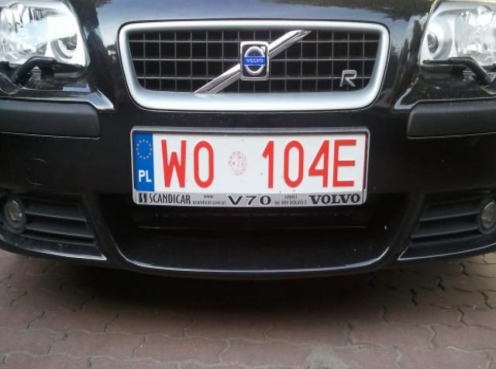

In [2]:
from twm_proj.implementation.image_reader import ImageReader

with open(path, "rb") as file:
    image = ImageReader().read(file)

show(image)

## Initial filtering (TODO)

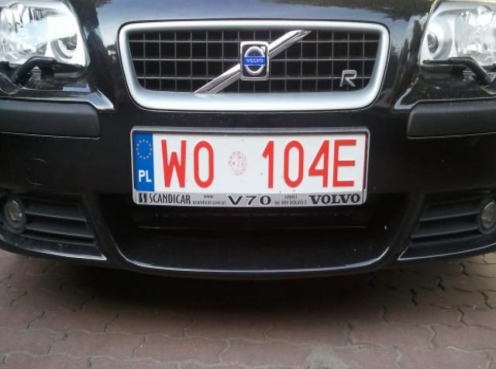

In [3]:
from twm_proj.implementation.initial_filter import InitialFilter

filtered = InitialFilter().filter(image)
show(filtered)

## Edge filter

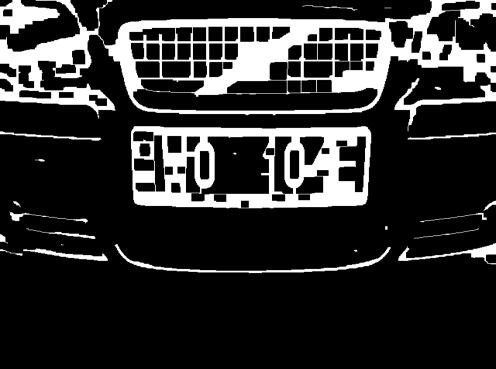

In [4]:
from twm_proj.implementation.edge_filter import EdgeFilter

edges = EdgeFilter().filter(image)
show(edges)

## Contour detector

contours count: 106
example contour:
 [[[457 434]]

 [[457 435]]

 [[458 436]]

 [[460 436]]

 [[460 434]]]


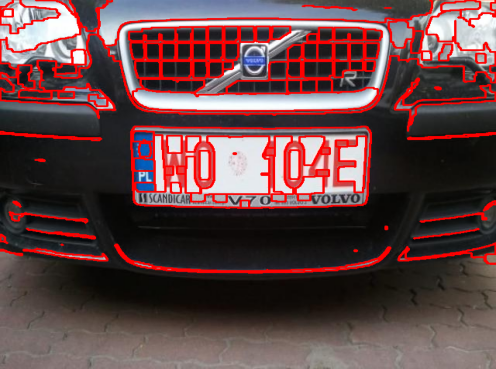

In [9]:
from twm_proj.implementation.contour_detector import ContourDetector

contours = [*ContourDetector().detect(edges)]
print("contours count:", len(contours))
print("example contour:\n", contours[0])
show_contours(image, contours)

## Detekcja prostokątów

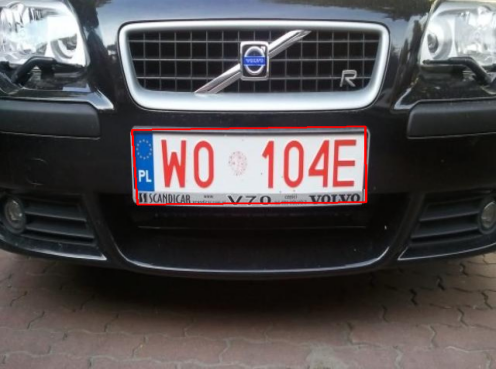

In [6]:
from twm_proj.implementation.rect_detector import RectDetector

rects = [RectDetector().detect(contour) for contour in contours]
rects = [rect for rect in rects if rect is not None]
show_contours(image, rects)